<a href="https://colab.research.google.com/github/Ranjankraj/Shala/blob/main/TF2_LiR_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf

print(tf.__version__)

2.4.0


In [8]:
import numpy as np

X_data = 2 * np.random.rand(100,1)
y_value = 3 * X_data + 4 + np.random.rand(100,1)

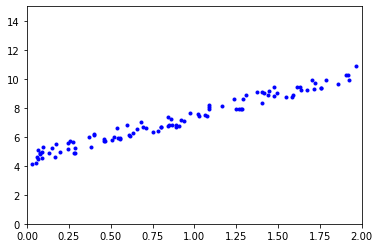

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X_data, y_value, 'b.')
plt.axis([0,2, 0,15])
plt.show() 

In [10]:
# def linear_regression(X, W, b):   #LiR model eq is y = WX + b
#   return tf.add(tf.matmul(W,X), b)      #we can also write W*X + b as it's operator overloading

# def mean_square(y_pred, y_true):
#   return tf.reduce_mean(tf.square(y_pred, y_true))


# linear regression model equation y = WX + b
def linear_regression(X, W, b):
    return tf.add(tf.multiply(W, X), b)

# mean square error loss function
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [11]:
# learning_rate = 0.01
# optimizer = tf.optimizers.SGD(learning_rate)

# def run_optimization(X, y, W, b):
  
#   with tf.GradientTape() as g:
#     pred = linear_regression(X, W, b)
#     loss = mean_square(pred, y)

#   gradients = g.gradient(loss, [W, b])

#   optimizer.apply_gradients(zip(gradients, [W, b]))



# Stochastic Gradient Descent optimizer
learning_rate = 0.01
optimizer = tf.optimizers.SGD(learning_rate)

# optimization function
def run_optimization(X, y, W, b):
    # wrap computation inside a GradientTape for automatic differentiation
    with tf.GradientTape() as g:
        pred = linear_regression(X, W, b)
        loss = mean_square(pred, y)

    # compute gradients
    gradients = g.gradient(loss, [W, b])

    # update W and b following gradients
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [14]:
training_steps = 1000
display_step = 50

W = tf.Variable(np.random.rand(), name='Weight')
b = tf.Variable(np.random.rand(), name='bias')

for step in range(1, training_steps + 1):

  run_optimization(X_data, y_value, W, b)

  if step % display_step == 0:
    pred = linear_regression(X_data, W, b)
    loss = mean_square(pred, y_value)
    print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))



step: 50, loss: 1.007287, W: 3.347858, b: 3.226638
step: 100, loss: 0.280847, W: 3.594764, b: 3.704859
step: 150, loss: 0.221549, W: 3.540304, b: 3.863959
step: 200, loss: 0.187420, W: 3.458269, b: 3.965447
step: 250, loss: 0.163014, W: 3.383809, b: 4.046997
step: 300, loss: 0.145454, W: 3.319982, b: 4.115561
step: 350, loss: 0.132816, W: 3.265746, b: 4.173642
step: 400, loss: 0.123721, W: 3.219723, b: 4.222905
step: 450, loss: 0.117175, W: 3.180679, b: 4.264693
step: 500, loss: 0.112465, W: 3.147555, b: 4.300143
step: 550, loss: 0.109075, W: 3.119456, b: 4.330216
step: 600, loss: 0.106635, W: 3.095618, b: 4.355730
step: 650, loss: 0.104879, W: 3.075395, b: 4.377373
step: 700, loss: 0.103615, W: 3.058239, b: 4.395735
step: 750, loss: 0.102706, W: 3.043685, b: 4.411311
step: 800, loss: 0.102051, W: 3.031339, b: 4.424525
step: 850, loss: 0.101580, W: 3.020865, b: 4.435735
step: 900, loss: 0.101241, W: 3.011980, b: 4.445244
step: 950, loss: 0.100997, W: 3.004443, b: 4.453312
step: 1000, l

In [15]:
print("W=", W.numpy(), "b=", b.numpy())

W= 2.9980469 b= 4.4601574


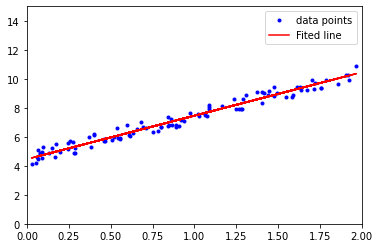

In [16]:
plt.plot(X_data, y_value, 'b.', label="data points")
plt.plot(X_data, linear_regression(X_data, W, b), "r-", label="Fited line")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()